In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [283]:
data = pd.read_csv("multiple_linear_regression.csv")

In [284]:
data = data.dropna()

In [285]:
data.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [286]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [287]:
x = data.iloc[:, [0,1]]

In [288]:
x

,Feature 1,Feature 2
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [289]:
y = data.iloc[:, [3]]

In [290]:
y

,Target
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [291]:
from sklearn.model_selection import train_test_split

In [292]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)

In [293]:
y_train = y_train.values
y_test = y_test.values
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [294]:
y_train

array([12.4, 11.2, 11.7,  8.5, 11.5, 20.2, 20.1, 15.9, 21.2, 18. , 21.4,
       14.6,  7.6, 15. , 11.4,  5.9, 12.6, 17.6, 13.4, 19.8, 12.6, 25.4,
       15.5, 22.3, 13.3, 11.5,  8.7,  8.8, 12.9,  1.6, 11.7, 12. , 23.8,
       11.3, 10.8, 11.9, 11.4, 10.9, 10.9, 10.4, 15. , 12. ,  9.5, 12.9,
       20.8, 10.6, 12.9, 11.9, 20.2, 20.7, 10.3,  4.8,  9.7,  7.2, 17.4,
       12.3, 11.9, 18.4,  8. , 14.7, 14. ,  5.3,  5.3, 19.7, 17.3, 19.2,
       12.8, 20.7, 16.6,  6.6, 16.6, 10.8, 13.6, 19. , 15.2, 27. ,  9.9,
       10.6, 11.8, 25.4,  9.7, 18.3,  8.7, 12.7, 15.5, 22.6,  7.2, 19.6,
       15.3, 17.2, 18. , 13.2, 15.9, 17. ,  9.7, 15.6, 15.9, 10.1, 19. ,
       18.5, 20.7, 23.2, 21.7, 24.2, 11.6,  8.4, 18.9, 15.5, 14.8, 14.9,
       11. , 14.1,  8.1,  9.6, 11.7, 25.4,  5.7,  9.4,  8.7,  9.5, 21.8,
       16.7, 15.2, 11.8,  8.8, 12.8, 25.5, 16. ,  7.3, 13.4,  7.3, 17.3,
       10.3, 10.7, 12.5, 23.8, 12.5,  9.7, 18. , 18.9])

In [295]:
from sklearn.linear_model import LinearRegression

In [296]:
lr = LinearRegression()

In [297]:
lr.fit(x_train, y_train)

LinearRegression()

In [298]:
y_pred = lr.predict(x_test)

In [299]:
y_pred

array([ 8.43926214, 15.37304406, 12.05589409,  9.76037047, 11.36264175,
       18.68952123, 24.00428962,  7.124972  , 21.99214225, 16.83157046,
        7.888633  , 23.10698611, 19.177439  ,  5.46457559, 15.39142217,
        9.83231859, 12.06037977,  9.74374744, 21.14699368,  9.16890787,
       20.42526086, 12.10020454, 13.76899074, 10.70760216, 16.23873324,
        7.81503969, 20.58658665, 20.31074286,  8.92099927, 14.11658568,
       17.23200766, 15.14199692, 17.19252602, 19.08093213, 17.19213209,
       12.1660591 , 12.75995477,  6.08137547, 10.11622664, 13.48286524,
       12.01527626,  9.68363397,  5.32036732, 10.1593781 , 14.23002243,
       14.05656862, 14.36668892, 10.4583096 , 21.08073585, 13.71348631,
        6.5130424 ,  7.94295045, 17.73710722, 17.73855545, 12.40906528,
       12.69288626, 20.61370184, 18.44595628,  4.59461636,  6.81597857])

In [300]:
resd1 = y_test - y_pred

## OLS Technque

In [301]:
x_test.shape

(60, 2)

In [302]:
x_with_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_with_const)
model
result = model.fit()
x_test = sm.add_constant(x_test)
pred_y = result.predict(x_test)
resd2 = y_test - pred_y

In [303]:
resd2.shape

(60,)

In [304]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     523.8
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           6.70e-65
Time:                        20:18:41   Log-Likelihood:                -276.51
No. Observations:                 140   AIC:                             559.0
Df Residuals:                     137   BIC:                             567.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0427      0.376      8.085      0.0

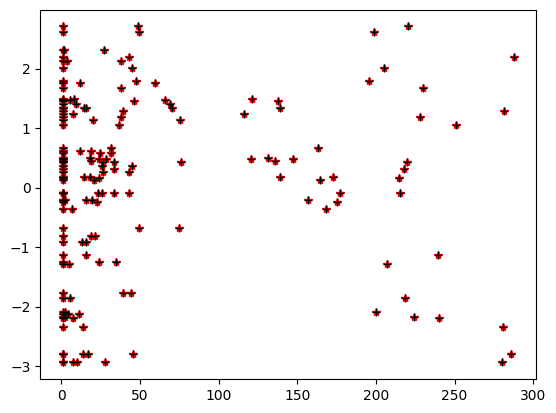

In [313]:
plt.plot(x_test, resd1, "*", label="SciKit Learn", color="red")
plt.plot(x_test, resd2, "+", label="OLS Modification", color="black")
plt.show()